In [1]:
# 任意选一个你喜欢的整数，这能帮你得到稳定的结果
seed = 9999

# 欢迎来到线性回归项目

若项目中的题目有困难没完成也没关系，我们鼓励你带着问题提交项目，评审人会给予你诸多帮助。

所有选做题都可以不做，不影响项目通过。如果你做了，那么项目评审会帮你批改，也会因为选做部分做错而判定为不通过。

其中非代码题可以提交手写后扫描的 pdf 文件，或使用 Latex 在文档中直接回答。

# 1 矩阵运算

## 1.1 创建一个 4*4 的单位矩阵

In [2]:
# 这个项目设计来帮你熟悉 python list 和线性代数
# 你不能调用任何NumPy以及相关的科学计算库来完成作业


# 本项目要求矩阵统一使用二维列表表示，如下：
A = [[1,2,3], 
     [2,3,3], 
     [1,2,5]]

B = [[1,2,3,5], 
     [2,3,3,5], 
     [1,2,5,1]]

#TODO 创建一个 4*4 单位矩阵
def get_MxN_Matrix(m,n,x):
    return [[x for i in range(m)] for j in range(n)]

dimension = 4
matrix = get_MxN_Matrix(4,4,0)
for i in xrange(dimension):
    matrix[i][i] = 1
print matrix

[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]


## 1.2 返回矩阵的行数和列数

In [3]:
# TODO 返回矩阵的行数和列数
def shape(M):
    rows = len(M)
    cols = len(M[0])
    return rows, cols


In [4]:
# 运行以下代码测试你的 shape 函数
%run -i -e test.py LinearRegressionTestCase.test_shape

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


## 1.3 每个元素四舍五入到特定小数数位

In [5]:
# TODO 每个元素四舍五入到特定小数数位
# 直接修改参数矩阵，无返回值
def matxRound(M, decPts=4):
    rowLen = len(M)
    for i in xrange(rowLen):
        colLen = len(M[i])
        for j in xrange(colLen):
            rounded_element = round(M[i][j], decPts)
            M[i][j] = rounded_element
    

In [6]:
# 运行以下代码测试你的 matxRound 函数
%run -i -e test.py LinearRegressionTestCase.test_matxRound

.
----------------------------------------------------------------------
Ran 1 test in 0.078s

OK


## 1.4 计算矩阵的转置

In [7]:
# TODO 计算矩阵的转置
def get_MxN_Matrix(m,n,x):
    return [[x for i in range(m)] for j in range(n)]

def transpose(M):
    rows = len(M)
    cols = len(M[0])
    t_M = get_MxN_Matrix(rows, cols, 0)
    for row in xrange(cols):
        for col in xrange(rows):
             t_M[row][col] = M[col][row]
                
    return t_M

In [8]:
# 运行以下代码测试你的 transpose 函数
%run -i -e test.py LinearRegressionTestCase.test_transpose

.
----------------------------------------------------------------------
Ran 1 test in 0.031s

OK


## 1.5 计算矩阵乘法 AB

In [9]:
# TODO 计算矩阵乘法 AB，如果无法相乘则raise ValueError
def get_MxN_Matrix(m,n,x):
    return [[x for i in range(m)] for j in range(n)]

def matxMultiply(A, B):
    rows_A = len(A)
    cols_A = len(A[0])
    rows_B = len(B)
    cols_B = len(B[0]) 
    
    if (cols_A != rows_B):
        raise ValueError
    
    # Solution 1
#     AB = get_MxN_Matrix(cols_B, rows_A, 0)
#     for row in xrange(rows_A):
#         for col in xrange(cols_B):
#             for index in xrange(cols_A):
#                 AB[row][col] += A[row][index]*B[index][col]
             
    # Solution 2
    AB = [[(sum(a*b for a,b in zip(tuple_A, tuple_B))) 
           for tuple_B in zip(*B)] 
              for tuple_A in A]
    
    return AB

In [10]:
# 运行以下代码测试你的 matxMultiply 函数
%run -i -e test.py LinearRegressionTestCase.test_matxMultiply

.
----------------------------------------------------------------------
Ran 1 test in 0.094s

OK


---

# 2 Gaussign Jordan 消元法

## 2.1 构造增广矩阵

$ A = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n}\\
    a_{21}    & a_{22} & ... & a_{2n}\\
    a_{31}    & a_{22} & ... & a_{3n}\\
    ...    & ... & ... & ...\\
    a_{n1}    & a_{n2} & ... & a_{nn}\\
\end{bmatrix} , b = \begin{bmatrix}
    b_{1}  \\
    b_{2}  \\
    b_{3}  \\
    ...    \\
    b_{n}  \\
\end{bmatrix}$

返回 $ Ab = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n} & b_{1}\\
    a_{21}    & a_{22} & ... & a_{2n} & b_{2}\\
    a_{31}    & a_{22} & ... & a_{3n} & b_{3}\\
    ...    & ... & ... & ...& ...\\
    a_{n1}    & a_{n2} & ... & a_{nn} & b_{n} \end{bmatrix}$

In [11]:
# TODO 构造增广矩阵，假设A，b行数相同
def get_MxN_Matrix(m,n,x):
    return [[x for i in range(m)] for j in range(n)]

import copy

def augmentMatrix(A, b):
    # Solution 1: Running Time = 0.013s
    rows = len(A)
    cols = len(A[0]) + len(b[0])
    Ab = get_MxN_Matrix(cols, rows, 0)
    for i in xrange(rows):
        for j in xrange(cols):
            if j==(cols-1):
                Ab[i][j] = b[i][0]
            else:
                Ab[i][j] = A[i][j]
    
    # Solution 2: Running Time = 0.026s
#     Ab = copy.deepcopy(A)
#     for i in xrange(len(Ab)):
#         Ab[i].append(b[i][0])
    
    return Ab

In [12]:
# 运行以下代码测试你的 augmentMatrix 函数
%run -i -e test.py LinearRegressionTestCase.test_augmentMatrix

.
----------------------------------------------------------------------
Ran 1 test in 0.014s

OK


## 2.2 初等行变换
- 交换两行
- 把某行乘以一个非零常数
- 把某行加上另一行的若干倍：

In [13]:
# TODO r1 <---> r2
# 直接修改参数矩阵，无返回值
def swapRows(M, r1, r2):
    l = M[r1]
    M[r1] = M[r2]
    M[r2] = l

In [14]:
# 运行以下代码测试你的 swapRows 函数
%run -i -e test.py LinearRegressionTestCase.test_swapRows

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [15]:
# TODO r1 <--- r1 * scale
# scale为0是非法输入，要求 raise ValueError
# 直接修改参数矩阵，无返回值
def scaleRow(M, r, scale):
    if scale == 0:
        raise ValueError
        
    for i in xrange(len(M[r])):
        M[r][i] *= scale

In [16]:
# 运行以下代码测试你的 scaleRow 函数
%run -i -e test.py LinearRegressionTestCase.test_scaleRow

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [31]:
# TODO r1 <--- r1 + r2*scale
# 直接修改参数矩阵，无返回值
def addScaledRow(M, r1, r2, scale):
#  这里不需要也不应该检查scale并抛出异常（为什么？）
#  不需要：因为就算scale == 0，也不会有什么影响。
#  不应该：因为scale == 0，应当是被允许的正当计算，不属于边界值问题。

    for i in xrange(len(M[r1])):
        M[r1][i] += M[r2][i]*scale

In [32]:
# 运行以下代码测试你的 addScaledRow 函数
%run -i -e test.py LinearRegressionTestCase.test_addScaledRow

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


## 2.3  Gaussian Jordan 消元法求解 Ax = b

### 2.3.1 算法

步骤1 检查A，b是否行数相同

步骤2 构造增广矩阵Ab

步骤3 逐列转换Ab为化简行阶梯形矩阵 [中文维基链接](https://zh.wikipedia.org/wiki/%E9%98%B6%E6%A2%AF%E5%BD%A2%E7%9F%A9%E9%98%B5#.E5.8C.96.E7.AE.80.E5.90.8E.E7.9A.84-.7Bzh-hans:.E8.A1.8C.3B_zh-hant:.E5.88.97.3B.7D-.E9.98.B6.E6.A2.AF.E5.BD.A2.E7.9F.A9.E9.98.B5)
    
    对于Ab的每一列（最后一列除外）
        当前列为列c
        寻找列c中 对角线以及对角线以下所有元素（行 c~N）的绝对值的最大值
        如果绝对值最大值为0
            那么A为奇异矩阵，返回None (你可以在选做问题2.4中证明为什么这里A一定是奇异矩阵)
        否则
            使用第一个行变换，将绝对值最大值所在行交换到对角线元素所在行（行c） 
            使用第二个行变换，将列c的对角线元素缩放为1
            多次使用第三个行变换，将列c的其他元素消为0
            
步骤4 返回Ab的最后一列

**注：** 我们并没有按照常规方法先把矩阵转化为行阶梯形矩阵，再转换为化简行阶梯形矩阵，而是一步到位。如果你熟悉常规方法的话，可以思考一下两者的等价性。

### 2.3.2 算法推演


为了充分了解Gaussian Jordan消元法的计算流程，请根据Gaussian Jordan消元法，分别手动推演矩阵A为***可逆矩阵***，矩阵A为***奇异矩阵***两种情况。

In [33]:
# 不要修改这里！
from helper import *

# A = generateMatrix(4,seed,singular=False)
A = generateMatrix(4,4,singular=False)
b = np.ones(shape=(4,1)) # it doesn't matter
Ab = augmentMatrix(A.tolist(),b.tolist()) # please make sure you already correct implement augmentMatrix
printInMatrixFormat(Ab,padding=4,truncating=0)

   4,  -5,  -9,  -2 ||  1  
  -2,   8,  -1,  -3 ||  1  
   3,  -2,  -6,   8 ||  1  
   2,  -4,   0,  -7 ||  1  


请按照算法的步骤3，逐步推演***可逆矩阵***的变换。

在下面列出每一次循环体执行之后的增广矩阵。

要求：
1. 做分数运算
2. 使用`\frac{n}{m}`来渲染分数，如下：
 - $\frac{n}{m}$
 - $-\frac{a}{b}$

增广矩阵
$ 
Ab = \begin{bmatrix}
	4	&	-5	&	-9	&	-2	&	1 \\
	-2	&	8	&	-1	&	-3	&	1 \\
	3	&	-2	&	-6	&	8	&	1 \\
	2	&	-4	&	0	&	-7	&	1 \\
\end{bmatrix}
$  


============ 1 Round ==============  
1. Swap the row of maximum with the row of diagonal element (row c):  
$
\rightarrow
\begin{bmatrix}
	4	&	-5	&	-9	&	-2	&	1\\
	-2	&	8	&	-1	&	-3	&	1\\
	3	&	-2	&	-6	&	8	&	1\\
	2	&	-4	&	0	&	-7	&	1\\
\end{bmatrix}
$  

2. Scale the diagonal element of column c to 1:  
$
\rightarrow
\begin{bmatrix}
	1	&	\frac{-5}{4}	&	\frac{-9}{4}	&	\frac{-1}{2}	&	\frac{1}{4}\\
	-2	&	8	&	-1	&	-3	&	1\\
	3	&	-2	&	-6	&	8	&	1\\
	2	&	-4	&	0	&	-7	&	1\\
\end{bmatrix}
$  

3. Eliminate every other element in column c:  
$
\rightarrow
\begin{bmatrix}
	1	&	\frac{-5}{4}	&	\frac{-9}{4}	&	\frac{-1}{2}	&	\frac{1}{4}\\
	0	&	\frac{11}{2}	&	\frac{-11}{2}	&	-4	&	\frac{3}{2}\\
	0	&	\frac{7}{4}	&	\frac{3}{4}	&	\frac{19}{2}	&	\frac{1}{4}\\
	0	&	\frac{-3}{2}	&	\frac{9}{2}	&	-6	&	\frac{1}{2}\\
\end{bmatrix}
$  


============ 2 Round ==============  
1. Swap the row of maximum with the row of diagonal element (row c):  
$
\rightarrow
\begin{bmatrix}
	1	&	\frac{-5}{4}	&	\frac{-9}{4}	&	\frac{-1}{2}	&	\frac{1}{4}\\
	0	&	\frac{11}{2}	&	\frac{-11}{2}	&	-4	&	\frac{3}{2}\\
	0	&	\frac{7}{4}	&	\frac{3}{4}	&	\frac{19}{2}	&	\frac{1}{4}\\
	0	&	\frac{-3}{2}	&	\frac{9}{2}	&	-6	&	\frac{1}{2}\\
\end{bmatrix}
$  

2. Scale the diagonal element of column c to 1:  
$
\rightarrow
\begin{bmatrix}
	1	&	\frac{-5}{4}	&	\frac{-9}{4}	&	\frac{-1}{2}	&	\frac{1}{4}\\
	0	&	1	&	-1	&	\frac{-8}{11}	&	\frac{3}{11}\\
	0	&	\frac{7}{4}	&	\frac{3}{4}	&	\frac{19}{2}	&	\frac{1}{4}\\
	0	&	\frac{-3}{2}	&	\frac{9}{2}	&	-6	&	\frac{1}{2}\\
\end{bmatrix}
$  

3. Eliminate every other element in column c:  
$
\rightarrow
\begin{bmatrix}
	1	&	0	&	\frac{-7}{2}	&	\frac{-31}{22}	&	\frac{13}{22}\\
	0	&	1	&	-1	&	\frac{-8}{11}	&	\frac{3}{11}\\
	0	&	0	&	\frac{5}{2}	&	\frac{237}{22}	&	\frac{-5}{22}\\
	0	&	0	&	3	&	\frac{-78}{11}	&	\frac{10}{11}\\
\end{bmatrix}
$  


============ 3 Round ==============  
1. Swap the row of maximum with the row of diagonal element (row c):  
$
\rightarrow
\begin{bmatrix}
	1	&	0	&	\frac{-7}{2}	&	\frac{-31}{22}	&	\frac{13}{22}\\
	0	&	1	&	-1	&	\frac{-8}{11}	&	\frac{3}{11}\\
	0	&	0	&	3	&	\frac{-78}{11}	&	\frac{10}{11}\\
	0	&	0	&	\frac{5}{2}	&	\frac{237}{22}	&	\frac{-5}{22}\\
\end{bmatrix}
$  

2. Scale the diagonal element of column c to 1:  
$
\rightarrow
\begin{bmatrix}
	1	&	0	&	\frac{-7}{2}	&	\frac{-31}{22}	&	\frac{13}{22}\\
	0	&	1	&	-1	&	\frac{-8}{11}	&	\frac{3}{11}\\
	0	&	0	&	1	&	\frac{-26}{11}	&	\frac{10}{33}\\
	0	&	0	&	\frac{5}{2}	&	\frac{237}{22}	&	\frac{-5}{22}\\
\end{bmatrix}
$  

3. Eliminate every other element in column c:  
$
\rightarrow
\begin{bmatrix}
	1	&	0	&	0	&	\frac{-213}{22}	&	\frac{109}{66}\\
	0	&	1	&	0	&	\frac{-34}{11}	&	\frac{19}{33}\\
	0	&	0	&	1	&	\frac{-26}{11}	&	\frac{10}{33}\\
	0	&	0	&	0	&	\frac{367}{22}	&	\frac{-65}{66}\\
\end{bmatrix}
$  


============ 4 Round ==============  
1. Swap the row of maximum with the row of diagonal element (row c):  
$
\rightarrow
\begin{bmatrix}
	1	&	0	&	0	&	\frac{-213}{22}	&	\frac{109}{66}\\
	0	&	1	&	0	&	\frac{-34}{11}	&	\frac{19}{33}\\
	0	&	0	&	1	&	\frac{-26}{11}	&	\frac{10}{33}\\
	0	&	0	&	0	&	\frac{367}{22}	&	\frac{-65}{66}\\
\end{bmatrix}
$  

2. Scale the diagonal element of column c to 1:  
$
\rightarrow
\begin{bmatrix}
	1	&	0	&	0	&	\frac{-213}{22}	&	\frac{109}{66}\\
	0	&	1	&	0	&	\frac{-34}{11}	&	\frac{19}{33}\\
	0	&	0	&	1	&	\frac{-26}{11}	&	\frac{10}{33}\\
	0	&	0	&	0	&	1	&	\frac{-65}{1101}\\
\end{bmatrix}
$  

3. Eliminate every other element in column c:  
$
\rightarrow
\begin{bmatrix}
	1	&	0	&	0	&	0	&	\frac{1189}{1101}\\
	0	&	1	&	0	&	0	&	\frac{433}{1101}\\
	0	&	0	&	1	&	0	&	\frac{60}{367}\\
	0	&	0	&	0	&	1	&	\frac{-65}{1101}\\
\end{bmatrix}
$  

==== Final Augmented Matrix ====  
$
\rightarrow
\begin{bmatrix}
	1.0	&	0.0	&	0.0	&	0.0	&	1.0799\\
	0.0	&	1.0	&	0.0	&	0.0	&	0.3933\\
	0.0	&	0.0	&	1.0	&	0.0	&	0.1635\\
	0.0	&	0.0	&	0.0	&	1.0	&	-0.059\\
\end{bmatrix}
$  

In [20]:
# 不要修改这里！
# A = generateMatrix(4,seed,singular=True)
A = generateMatrix(4,4,singular=True)
b = np.ones(shape=(4,1)) # it doesn't matter
Ab = augmentMatrix(A.tolist(),b.tolist()) # please make sure you already correct implement augmentMatrix
printInMatrixFormat(Ab,padding=4,truncating=0)

   3,   1,   2,  -4 ||  1  
   7, -10,   4,   5 ||  1  
   6,  -3,   5,  -6 ||  1  
  -4,   3,  -3,   2 ||  1  


请按照算法的步骤3，逐步推演***奇异矩阵***的变换。

在下面列出每一次循环体执行之后的增广矩阵。

要求：
1. 做分数运算
2. 使用`\frac{n}{m}`来渲染分数，如下：
 - $\frac{n}{m}$
 - $-\frac{a}{b}$

增广矩阵
$ 
Ab = \begin{bmatrix}
	3	&	1	&	2	&	-4	&	1\\
	7	&	-10	&	4	&	5	&	1\\
	6	&	-3	&	5	&	-6	&	1\\
	-4	&	3	&	-3	&	2	&	1\\
\end{bmatrix}
$


============ 1 Round ==============  
1. Swap the row of maximum with the row of diagonal element (row c):  
$
\rightarrow
\begin{bmatrix}
	7	&	-10	&	4	&	5	&	1\\
	3	&	1	&	2	&	-4	&	1\\
	6	&	-3	&	5	&	-6	&	1\\
	-4	&	3	&	-3	&	2	&	1\\
\end{bmatrix}
$  

2. Scale the diagonal element of column c to 1:  
$
\rightarrow
\begin{bmatrix}
	1	&	\frac{-10}{7}	&	\frac{4}{7}	&	\frac{5}{7}	&	\frac{1}{7}\\
	3	&	1	&	2	&	-4	&	1\\
	6	&	-3	&	5	&	-6	&	1\\
	-4	&	3	&	-3	&	2	&	1\\
\end{bmatrix}
$  

3. Eliminate every other element in column c:  
$
\rightarrow
\begin{bmatrix}
	1	&	\frac{-10}{7}	&	\frac{4}{7}	&	\frac{5}{7}	&	\frac{1}{7}\\
	0	&	\frac{37}{7}	&	\frac{2}{7}	&	\frac{-43}{7}	&	\frac{4}{7}\\
	0	&	\frac{39}{7}	&	\frac{11}{7}	&	\frac{-72}{7}	&	\frac{1}{7}\\
	0	&	\frac{-19}{7}	&	\frac{-5}{7}	&	\frac{34}{7}	&	\frac{11}{7}\\
\end{bmatrix}
$  


============ 2 Round ==============  
1. Swap the row of maximum with the row of diagonal element (row c):  
$
\rightarrow
\begin{bmatrix}
	1	&	\frac{-10}{7}	&	\frac{4}{7}	&	\frac{5}{7}	&	\frac{1}{7}\\
	0	&	\frac{39}{7}	&	\frac{11}{7}	&	\frac{-72}{7}	&	\frac{1}{7}\\
	0	&	\frac{37}{7}	&	\frac{2}{7}	&	\frac{-43}{7}	&	\frac{4}{7}\\
	0	&	\frac{-19}{7}	&	\frac{-5}{7}	&	\frac{34}{7}	&	\frac{11}{7}\\
\end{bmatrix}
$  

2. Scale the diagonal element of column c to 1:  
$
\rightarrow
\begin{bmatrix}
	1	&	\frac{-10}{7}	&	\frac{4}{7}	&	\frac{5}{7}	&	\frac{1}{7}\\
	0	&	1	&	\frac{11}{39}	&	\frac{-24}{13}	&	\frac{1}{39}\\
	0	&	\frac{37}{7}	&	\frac{2}{7}	&	\frac{-43}{7}	&	\frac{4}{7}\\
	0	&	\frac{-19}{7}	&	\frac{-5}{7}	&	\frac{34}{7}	&	\frac{11}{7}\\
\end{bmatrix}
$  

3. Eliminate every other element in column c:  
$
\rightarrow
\begin{bmatrix}
	1	&	0	&	\frac{38}{39}	&	\frac{-25}{13}	&	\frac{7}{39}\\
	0	&	1	&	\frac{11}{39}	&	\frac{-24}{13}	&	\frac{1}{39}\\
	0	&	0	&	\frac{-47}{39}	&	\frac{47}{13}	&	\frac{17}{39}\\
	0	&	0	&	\frac{2}{39}	&	\frac{-2}{13}	&	\frac{64}{39}\\
\end{bmatrix}
$  


============ 3 Round ==============  
1. Swap the row of maximum with the row of diagonal element (row c):  
$
\rightarrow
\begin{bmatrix}
	1	&	0	&	\frac{38}{39}	&	\frac{-25}{13}	&	\frac{7}{39}\\
	0	&	1	&	\frac{11}{39}	&	\frac{-24}{13}	&	\frac{1}{39}\\
	0	&	0	&	\frac{-47}{39}	&	\frac{47}{13}	&	\frac{17}{39}\\
	0	&	0	&	\frac{2}{39}	&	\frac{-2}{13}	&	\frac{64}{39}\\
\end{bmatrix}
$  

2. Scale the diagonal element of column c to 1:  
$
\rightarrow
\begin{bmatrix}
	1	&	0	&	\frac{38}{39}	&	\frac{-25}{13}	&	\frac{7}{39}\\
	0	&	1	&	\frac{11}{39}	&	\frac{-24}{13}	&	\frac{1}{39}\\
	0	&	0	&	1	&	-3	&	\frac{-17}{47}\\
	0	&	0	&	\frac{2}{39}	&	\frac{-2}{13}	&	\frac{64}{39}\\
\end{bmatrix}
$  

3. Eliminate every other element in column c:  
$
\rightarrow
\begin{bmatrix}
	1	&	0	&	0	&	1	&	\frac{25}{47}\\
	0	&	1	&	0	&	-1	&	\frac{6}{47}\\
	0	&	0	&	1	&	-3	&	\frac{-17}{47}\\
	0	&	0	&	0	&	0	&	\frac{78}{47}\\
\end{bmatrix}
$  


============ 4 Round ==============  
This matrix is sigular!

### 2.3.3 实现 Gaussian Jordan 消元法

In [20]:
# coding=UTF-8
# TODO 实现 Gaussain Jordan 方法求解 Ax = b

""" Gaussian Jordan 方法求解 Ax = b.
    参数
        A: 方阵 
        b: 列向量
        decPts: 四舍五入位数，默认为4
        epsilon: 判读是否为0的阈值，默认 1.0e-16
        
    返回列向量 x 使得 Ax = b 
    返回None，如果 A，b 高度不同
    返回None，如果 A 为奇异矩阵
"""
from fractions import Fraction
from decimal import Decimal, getcontext
import types

getcontext().prec = 30

# 0: Markdown Form
# 1: Normal Form
OutputForm = 1

# 0: Do not output process
# 1: Output process
OutputProcess = 1

# row operation 1
def swapRows(M, r1, r2):
    if r1 == r2:
        return

    l = M[r1]
    M[r1] = M[r2]
    M[r2] = l


# row operation 2
def scaleRow(M, r, scale):
    if scale == 0:
        raise ValueError

    for i in xrange(len(M[r])):
        M[r][i] = scale * M[r][i]


# row operation 3
def addScaledRow(M, r1, r2, scale):
    if scale == 0:
        raise ValueError

    for i in xrange(len(M[r1])):
        M[r1][i] += M[r2][i] * scale


def augmentMatrix(A, b):
    # Solution 1: Running Time = 0.013s
    rows = len(A)
    cols = len(A[0]) + len(b[0])
    Ab = get_RxC_Matrix(rows, cols, 0)
    for i in xrange(rows):
        for j in xrange(cols):
            if j == (cols-1):
                Ab[i][j] = b[i][0]
            else:
                Ab[i][j] = A[i][j]
    return Ab


def maxAbsIndex(matrix, col):
    rows = len(matrix)
    cols = len(matrix[0])

    if col >= cols:
        return None

    maxAbs = 0
    index = col
    for i in xrange(col, rows):
        currentAbs = abs(matrix[i][col])
        if currentAbs > maxAbs:
            maxAbs = currentAbs
            index = i

    return maxAbs, index


def get_RxC_Matrix(rows, cols, x):
    return [[x for i in range(cols)] for j in range(rows)]


def getLastCol(Ab):
    rows = len(Ab)
    lastCol = get_RxC_Matrix(rows, 1, 0)
    for i in xrange(rows):
        lastCol[i][0] = Ab[i][len(Ab[0])-1]
    return lastCol

# print the markdown form of the matrix
def print_matrix_md(m):
    if m == None:
        return

    rows = len(m)
    cols = len(m[0])
    matrix = "$\n\\rightarrow\n\\begin{bmatrix}\n"
    for row in xrange(rows):
        matrix += "\t"
        for col in xrange(cols):
            f = m[row][col]
            if col == cols-1:
                matrix += get_frac_md(f) + "\\\\"
            else:
                matrix += get_frac_md(f) + "\t&\t"
        matrix += "\n"
    matrix += "\\end{bmatrix}\n$  \n"
    print matrix

# transfer the Fraction to markdown form: \frac{numerator}{denominator}
def get_frac_md(f):
    if not isinstance(f, Fraction):
        return str(f)

    frac = ''
    if f.denominator == 1:
        frac = str(f.numerator)
    else:
        frac = "\\frac{" + str(f.numerator) + "}{" + str(f.denominator) + "}"
    return frac


def print_matrix(m):
    if m == None:
        return

    rows = len(m)
    cols = len(m[0])
    matrix = ""
    for row in xrange(rows):
        matrix += "|\t"
        for col in xrange(cols):
            matrix += "{}\t".format(m[row][col])
        matrix += "\t|\n"
    print matrix

def print_matrix_form(m, form=1):
    if form == 0:
        print_matrix_md(m)
    elif form == 1:
        print_matrix(m)

def fraction_to_float(m, decPts=4, epsilon=1.0e-16):
    rows = len(m)
    cols = len(m[0])
    matrix = get_RxC_Matrix(rows, cols, 0)
    for row in xrange(rows):
        for col in xrange(cols):
            value = m[row][col]
            value = Decimal(value.numerator)/Decimal(value.denominator)
            if is_near_zero(value):
                value = 0.0
            else:
                value = round(value, decPts)

            matrix[row][col] = value
    return matrix


def is_near_zero(value, epsilon=1.0e-16):
    return abs(value) < epsilon


def gj_Solve(A, b, decPts=4, epsilon=1.0e-16):
    # Step 1: Check if A and b have same number of rows
    if (len(A) != len(b)):
        return None

    # Step 2: Construct augmented matrix Ab
    Ab = augmentMatrix(A, b)

    # Step 3: Column by column, transform Ab to RREF(reduced row echelon form)
    rows = len(A)
    cols = len(A[0])
    for col in xrange(cols):
        if OutputProcess == 1:
            print "\n============ {} Round ==============  ".format(col + 1)
        # Find in column c, at diagonal and under diagonal (row c ~ N) the
        # maximum absolute value
        maxAbs, index = maxAbsIndex(Ab, col)
        if maxAbs == 0:
            # If the maximum absolute value is 0, then A is singular, return
            # None
            if OutputProcess == 1:
                print "This matrix is sigular!"
            return None
        else:
            # Apply row operation 1, swap the row of maximum with the row of
            # diagonal element (row c)
            swapRows(Ab, col, index)

            if OutputProcess == 1:
                print "1. Swap the row of maximum with the row of diagonal element (row c):  "
                print_matrix_form(Ab, OutputForm)

            # Apply row operation 2, scale the diagonal element of column c to
            # 1
            if Ab[col][col] != 0:
                scaleRow(Ab, col, Fraction(1, Ab[col][col]))

            if OutputProcess == 1:
                print '2. Scale the diagonal element of column c to 1:  '
                print_matrix_form(Ab, OutputForm)
            
            # Apply row operation 3 mutiple time, eliminate every other element
            # in column c
            for scaleRowIndex in xrange(rows):
                if scaleRowIndex == col:
                    continue

                scale = -Ab[scaleRowIndex][col]
                if scale == 0:
                    continue
                else:
                    addScaledRow(Ab, scaleRowIndex, col, scale)
            if OutputProcess == 1:
                print "3. Eliminate every other element in column c:  "
                print_matrix_form(Ab, OutputForm)

    # transfer the matrix from fractions to floats
    Ab = fraction_to_float(Ab, decPts, epsilon)
    if OutputProcess == 1:
        print "==== Final Augmented Matrix ====  "
        print_matrix_form(Ab, OutputForm)

    x = getLastCol(Ab)
    return x

In [21]:
# 运行以下代码测试你的 gj_Solve 函数
%run -i -e test.py LinearRegressionTestCase.test_gj_Solve


============ 1 Round ==============  
1. Swap the row of maximum with the row of diagonal element (row c):  
|	9	-7	-2	-9	7	-4	-9	-9	2	5		|
|	-1	4	9	-9	-7	-4	-4	-6	-5	1		|
|	5	-10	5	8	-5	-2	-4	5	-8	2		|
|	8	-2	8	-4	-9	-5	6	-3	-8	3		|
|	-5	2	-9	-8	-3	9	9	-4	-2	4		|
|	-6	8	-7	6	2	5	3	5	-4	0		|
|	-5	-9	6	3	5	1	-6	5	-8	6		|
|	3	-10	-8	-3	-6	4	0	-2	-2	7		|
|	2	-8	5	-3	4	-9	-9	-7	5	8		|

2. Scale the diagonal element of column c to 1:  
|	1	-7/9	-2/9	-1	7/9	-4/9	-1	-1	2/9	5/9		|
|	-1	4	9	-9	-7	-4	-4	-6	-5	1		|
|	5	-10	5	8	-5	-2	-4	5	-8	2		|
|	8	-2	8	-4	-9	-5	6	-3	-8	3		|
|	-5	2	-9	-8	-3	9	9	-4	-2	4		|
|	-6	8	-7	6	2	5	3	5	-4	0		|
|	-5	-9	6	3	5	1	-6	5	-8	6		|
|	3	-10	-8	-3	-6	4	0	-2	-2	7		|
|	2	-8	5	-3	4	-9	-9	-7	5	8		|

3. Eliminate every other element in column c:  
|	1	-7/9	-2/9	-1	7/9	-4/9	-1	-1	2/9	5/9		|
|	0	29/9	79/9	-10	-56/9	-40/9	-5	-7	-43/9	14/9		|
|	0	-55/9	55/9	13	-80/9	2/9	1	10	-82/9	-7/9		|
|	0	38/9	88/9	4	-137/9	-13/9	14	5	-88/9	-13/9		|
|	0	-17/9	-91/9	-13	8/9	61/9	4	-9	-8/9	

3. Eliminate every other element in column c:  
|	1	0	0	39/136	73/136	43/68	9/68	1/4	-105/136		|
|	0	1	0	-1081/1224	857/1224	-1/612	49/68	11/12	-113/1224		|
|	0	0	1	3/17	3/17	4/17	21/17	0	-12/17		|
|	0	0	0	449/136	-401/136	-307/68	-137/68	-65/4	329/136		|
|	0	0	0	-545/68	-239/68	39/34	-573/34	-5/2	327/68		|
|	0	0	0	7541/612	299/612	647/306	325/34	11/6	-635/612		|
|	0	0	0	5057/1224	-4633/1224	2969/612	-505/68	-7/12	5017/1224		|
|	0	0	0	197/18	-133/18	-37/9	-1	1/3	-77/18		|


============ 4 Round ==============  
1. Swap the row of maximum with the row of diagonal element (row c):  
|	1	0	0	39/136	73/136	43/68	9/68	1/4	-105/136		|
|	0	1	0	-1081/1224	857/1224	-1/612	49/68	11/12	-113/1224		|
|	0	0	1	3/17	3/17	4/17	21/17	0	-12/17		|
|	0	0	0	7541/612	299/612	647/306	325/34	11/6	-635/612		|
|	0	0	0	-545/68	-239/68	39/34	-573/34	-5/2	327/68		|
|	0	0	0	449/136	-401/136	-307/68	-137/68	-65/4	329/136		|
|	0	0	0	5057/1224	-4633/1224	2969/612	-505/68	-7/12	5017/1224		|
|	0	0	0	197/18	-133/18	-37/9	

3. Eliminate every other element in column c:  
|	1	0	0	0	0	0	0	0	0	86687818/46412109		|
|	0	1	0	0	0	0	0	0	0	-511399691/278472654		|
|	0	0	1	0	0	0	0	0	0	378811015/278472654		|
|	0	0	0	1	0	0	0	0	0	244013501/278472654		|
|	0	0	0	0	1	0	0	0	0	-216950527/278472654		|
|	0	0	0	0	0	1	0	0	0	155242043/139236327		|
|	0	0	0	0	0	0	1	0	0	-127073257/139236327		|
|	0	0	0	0	0	0	0	1	0	-41047607/92824218		|
|	0	0	0	0	0	0	0	0	1	266197115/278472654		|

==== Final Augmented Matrix ====  
|	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.8678		|
|	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.8364		|
|	0.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	1.3603		|
|	0.0	0.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.8763		|
|	0.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	0.0	-0.7791		|
|	0.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	1.115		|
|	0.0	0.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0	-0.9126		|
|	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	0.0	-0.4422		|
|	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	0.9559		|


============ 1 Round ==============  
1. Swap the row of maximum with the row of diagonal el

3. Eliminate every other element in column c:  
|	1	0	0	0	0	69788/408201	88105/408201	12287/136067	-174418/408201	-57827/136067		|
|	0	1	0	0	0	-67239/136067	-129479/136067	-73735/136067	-143662/136067	106561/136067		|
|	0	0	1	0	0	89461/408201	145223/408201	-43164/136067	108658/408201	47466/136067		|
|	0	0	0	1	0	-37549/136067	510/136067	-26651/136067	10689/136067	15065/136067		|
|	0	0	0	0	1	-46595/408201	-321715/408201	97672/136067	-63479/408201	-27968/136067		|
|	0	0	0	0	0	2325286/408201	-3866542/408201	578150/136067	-928325/408201	1791645/136067		|
|	0	0	0	0	0	3266909/408201	2342680/408201	-450275/136067	5790491/408201	-27951/136067		|
|	0	0	0	0	0	2501734/408201	-1510735/408201	-1100298/136067	-3397310/408201	817307/136067		|
|	0	0	0	0	0	719206/136067	-2000411/136067	669926/136067	-226528/136067	780242/136067		|


============ 6 Round ==============  
1. Swap the row of maximum with the row of diagonal element (row c):  
|	1	0	0	0	0	69788/408201	88105/408201	12287/136067	-174418/40820

3. Eliminate every other element in column c:  
|	1	0	0	53/84	-1/12	59/84	-61/84	17/42		|
|	0	1	0	-67/24	-55/24	11/24	11/24	11/12		|
|	0	0	1	-131/168	7/24	187/168	43/168	-65/84		|
|	0	0	0	-124/7	-17	-44/7	15/7	66/7		|
|	0	0	0	-127/56	-5/8	-321/56	-305/56	-41/28		|
|	0	0	0	235/28	69/4	-207/28	-75/28	-11/14		|
|	0	0	0	-3/56	-25/8	-893/56	499/56	227/28		|


============ 4 Round ==============  
1. Swap the row of maximum with the row of diagonal element (row c):  
|	1	0	0	53/84	-1/12	59/84	-61/84	17/42		|
|	0	1	0	-67/24	-55/24	11/24	11/24	11/12		|
|	0	0	1	-131/168	7/24	187/168	43/168	-65/84		|
|	0	0	0	-124/7	-17	-44/7	15/7	66/7		|
|	0	0	0	-127/56	-5/8	-321/56	-305/56	-41/28		|
|	0	0	0	235/28	69/4	-207/28	-75/28	-11/14		|
|	0	0	0	-3/56	-25/8	-893/56	499/56	227/28		|

2. Scale the diagonal element of column c to 1:  
|	1	0	0	53/84	-1/12	59/84	-61/84	17/42		|
|	0	1	0	-67/24	-55/24	11/24	11/24	11/12		|
|	0	0	1	-131/168	7/24	187/168	43/168	-65/84		|
|	0	0	0	1	119/124	11/31	-15/124	-33/62		|
|	


============ 1 Round ==============  
1. Swap the row of maximum with the row of diagonal element (row c):  
|	-10	4	-3	-5	2		|
|	-7	9	-9	6	1		|
|	3	8	-4	6	0		|
|	-3	-10	6	-9	3		|

2. Scale the diagonal element of column c to 1:  
|	1	-2/5	3/10	1/2	-1/5		|
|	-7	9	-9	6	1		|
|	3	8	-4	6	0		|
|	-3	-10	6	-9	3		|

3. Eliminate every other element in column c:  
|	1	-2/5	3/10	1/2	-1/5		|
|	0	31/5	-69/10	19/2	-2/5		|
|	0	46/5	-49/10	9/2	3/5		|
|	0	-56/5	69/10	-15/2	12/5		|


============ 2 Round ==============  
1. Swap the row of maximum with the row of diagonal element (row c):  
|	1	-2/5	3/10	1/2	-1/5		|
|	0	-56/5	69/10	-15/2	12/5		|
|	0	46/5	-49/10	9/2	3/5		|
|	0	31/5	-69/10	19/2	-2/5		|

2. Scale the diagonal element of column c to 1:  
|	1	-2/5	3/10	1/2	-1/5		|
|	0	1	-69/112	75/112	-3/14		|
|	0	46/5	-49/10	9/2	3/5		|
|	0	31/5	-69/10	19/2	-2/5		|

3. Eliminate every other element in column c:  
|	1	0	3/56	43/56	-2/7		|
|	0	1	-69/112	75/112	-3/14		|
|	0	0	43/56	-93/56	18/7		|
|	0	0	-345/1

3. Eliminate every other element in column c:  
|	1	0	0	0	0	0	0	-1630053/3400801	-19188/117269	2827187/3400801		|
|	0	1	0	0	0	0	0	5691059/6801602	-365425/703614	-1247039/3400801		|
|	0	0	1	0	0	0	0	7386227/6801602	146807/703614	-1080194/3400801		|
|	0	0	0	1	0	0	0	1131875/6801602	82537/703614	2432163/3400801		|
|	0	0	0	0	1	0	0	138947/3400801	-82368/117269	4196248/3400801		|
|	0	0	0	0	0	1	0	-284395/6801602	444811/703614	-349302/3400801		|
|	0	0	0	0	0	0	1	438927/6801602	-58907/703614	-3190532/3400801		|
|	0	0	0	0	0	0	0	-40676543/3400801	-1452209/351807	73838254/3400801		|
|	0	0	0	0	0	0	0	-24031133/3400801	-1150099/117269	-7137076/3400801		|


============ 8 Round ==============  
1. Swap the row of maximum with the row of diagonal element (row c):  
|	1	0	0	0	0	0	0	-1630053/3400801	-19188/117269	2827187/3400801		|
|	0	1	0	0	0	0	0	5691059/6801602	-365425/703614	-1247039/3400801		|
|	0	0	1	0	0	0	0	7386227/6801602	146807/703614	-1080194/3400801		|
|	0	0	0	1	0	0	0	1131875/6801602	82537/703614	

3. Eliminate every other element in column c:  
|	1	0	0	0	0	-495/1313		|
|	0	1	0	0	0	24933/1313		|
|	0	0	1	0	0	-17653/1313		|
|	0	0	0	1	0	-29205/1313		|
|	0	0	0	0	1	-31299/1313		|

==== Final Augmented Matrix ====  
|	1.0	0.0	0.0	0.0	0.0	-0.377		|
|	0.0	1.0	0.0	0.0	0.0	18.9893		|
|	0.0	0.0	1.0	0.0	0.0	-13.4448		|
|	0.0	0.0	0.0	1.0	0.0	-22.243		|
|	0.0	0.0	0.0	0.0	1.0	-23.8378		|


============ 1 Round ==============  
1. Swap the row of maximum with the row of diagonal element (row c):  
|	-8	-5	-2	-1	1	8	-4	-10	0		|
|	-2	7	5	7	-1	4	-1	-3	1		|
|	-4	7	9	-5	-7	-2	9	-3	2		|
|	-2	-2	6	7	3	-4	5	-4	3		|
|	-7	1	1	2	0	-10	-9	0	4		|
|	1	-9	-5	3	8	6	-6	-5	5		|
|	4	-6	0	6	6	0	4	4	6		|
|	3	-3	5	5	3	-2	-2	7	7		|

2. Scale the diagonal element of column c to 1:  
|	1	5/8	1/4	1/8	-1/8	-1	1/2	5/4	0		|
|	-2	7	5	7	-1	4	-1	-3	1		|
|	-4	7	9	-5	-7	-2	9	-3	2		|
|	-2	-2	6	7	3	-4	5	-4	3		|
|	-7	1	1	2	0	-10	-9	0	4		|
|	1	-9	-5	3	8	6	-6	-5	5		|
|	4	-6	0	6	6	0	4	4	6		|
|	3	-3	5	5	3	-2	-2	7	7		|

3. Eliminate eve


============ 9 Round ==============  
1. Swap the row of maximum with the row of diagonal element (row c):  
|	1	0	0	0	0	0	0	0	-78068091/108389060	-77740553/108389060		|
|	0	1	0	0	0	0	0	0	25245252/27097265	1240316/27097265		|
|	0	0	1	0	0	0	0	0	509777/54194530	-43345559/54194530		|
|	0	0	0	1	0	0	0	0	35086705/10838906	8213967/10838906		|
|	0	0	0	0	1	0	0	0	78945377/54194530	-16966149/54194530		|
|	0	0	0	0	0	1	0	0	128726113/108389060	42285079/108389060		|
|	0	0	0	0	0	0	1	0	-13020963/5419453	-6200520/5419453		|
|	0	0	0	0	0	0	0	1	-16878151/10838906	-8086619/10838906		|
|	0	0	0	0	0	0	0	0	-854805249/108389060	1672525233/108389060		|

2. Scale the diagonal element of column c to 1:  
|	1	0	0	0	0	0	0	0	-78068091/108389060	-77740553/108389060		|
|	0	1	0	0	0	0	0	0	25245252/27097265	1240316/27097265		|
|	0	0	1	0	0	0	0	0	509777/54194530	-43345559/54194530		|
|	0	0	0	1	0	0	0	0	35086705/10838906	8213967/10838906		|
|	0	0	0	0	1	0	0	0	78945377/54194530	-16966149/54194530		|
|	0	0	0	0	0	1	0	0	128726113/

==== Final Augmented Matrix ====  
|	1.0	0.0	0.0	0.0	0.0	0.7932		|
|	0.0	1.0	0.0	0.0	0.0	-0.4198		|
|	0.0	0.0	1.0	0.0	0.0	-2.6285		|
|	0.0	0.0	0.0	1.0	0.0	0.1394		|
|	0.0	0.0	0.0	0.0	1.0	0.7592		|


============ 1 Round ==============  
1. Swap the row of maximum with the row of diagonal element (row c):  
|	6	7	1	5	6	-1	3	1	2		|
|	4	5	9	3	9	-3	4	9	1		|
|	-4	1	-5	0	7	9	-10	0	0		|
|	-5	-9	-7	7	9	-5	-7	5	3		|
|	-6	8	2	-1	2	6	-2	9	4		|
|	3	7	8	2	-6	-8	-10	-3	5		|
|	0	-9	9	-2	-10	-10	8	5	6		|
|	2	-8	-8	8	-3	-10	6	8	7		|

2. Scale the diagonal element of column c to 1:  
|	1	7/6	1/6	5/6	1	-1/6	1/2	1/6	1/3		|
|	4	5	9	3	9	-3	4	9	1		|
|	-4	1	-5	0	7	9	-10	0	0		|
|	-5	-9	-7	7	9	-5	-7	5	3		|
|	-6	8	2	-1	2	6	-2	9	4		|
|	3	7	8	2	-6	-8	-10	-3	5		|
|	0	-9	9	-2	-10	-10	8	5	6		|
|	2	-8	-8	8	-3	-10	6	8	7		|

3. Eliminate every other element in column c:  
|	1	7/6	1/6	5/6	1	-1/6	1/2	1/6	1/3		|
|	0	1/3	25/3	-1/3	5	-7/3	2	25/3	-1/3		|
|	0	17/3	-13/3	10/3	11	25/3	-8	2/3	4/3		|
|	0	-19/6	-37/6	67/6	14	-35/6	



============ 5 Round ==============  
1. Swap the row of maximum with the row of diagonal element (row c):  
|	1	0	0	0	-789/1043	776/1043	-87/149	-75/1043	-27/1043	129/1043		|
|	0	1	0	0	2637/2086	-439/2086	205/1043	-57/149	2055/2086	-1077/2086		|
|	0	0	1	0	95/149	-1095/1043	464/1043	-475/1043	-22/1043	72/1043		|
|	0	0	0	1	-1291/1043	554/1043	-737/1043	-802/1043	-1439/1043	998/1043		|
|	0	0	0	0	-14961/1043	2322/1043	324/1043	-8492/1043	-21849/1043	7937/1043		|
|	0	0	0	0	12326/1043	-13161/1043	12426/1043	-7144/1043	10415/1043	-4001/1043		|
|	0	0	0	0	21657/2086	-17131/2086	1220/1043	14179/1043	42673/2086	-9255/2086		|
|	0	0	0	0	-7411/1043	2983/1043	-6663/1043	-8457/1043	-4910/1043	9188/1043		|
|	0	0	0	0	-6865/2086	2731/298	3593/1043	-3008/1043	-29695/2086	3703/298		|

2. Scale the diagonal element of column c to 1:  
|	1	0	0	0	-789/1043	776/1043	-87/149	-75/1043	-27/1043	129/1043		|
|	0	1	0	0	2637/2086	-439/2086	205/1043	-57/149	2055/2086	-1077/2086		|
|	0	0	1	0	95/149	-1095/1043	464/10

.


3. Eliminate every other element in column c:  
|	1	0	-9/31	-7/93		|
|	0	1	-21/31	-2/31		|
|	0	0	365/31	215/93		|


============ 3 Round ==============  
1. Swap the row of maximum with the row of diagonal element (row c):  
|	1	0	-9/31	-7/93		|
|	0	1	-21/31	-2/31		|
|	0	0	365/31	215/93		|

2. Scale the diagonal element of column c to 1:  
|	1	0	-9/31	-7/93		|
|	0	1	-21/31	-2/31		|
|	0	0	1	43/219		|

3. Eliminate every other element in column c:  
|	1	0	0	-4/219		|
|	0	1	0	5/73		|
|	0	0	1	43/219		|

==== Final Augmented Matrix ====  
|	1.0	0.0	0.0	-0.0183		|
|	0.0	1.0	0.0	0.0685		|
|	0.0	0.0	1.0	0.1963		|


============ 1 Round ==============  
1. Swap the row of maximum with the row of diagonal element (row c):  
|	-9	-10	1	-1	1	8	-1	4		|
|	4	-6	-4	-4	6	-3	-4	1		|
|	-8	-4	-7	-10	-6	-6	-5	2		|
|	5	-1	3	-1	-10	-7	2	3		|
|	2	3	-4	-10	7	9	3	0		|
|	8	8	-3	-3	4	9	-2	5		|
|	7	-8	6	4	-3	-10	-10	6		|

2. Scale the diagonal element of column c to 1:  
|	1	10/9	-1/9	1/9	-1/9	-8/9	1/9	-4/9		|
|	


----------------------------------------------------------------------
Ran 1 test in 3.572s

OK


## (选做) 2.4 算法正确判断了奇异矩阵：

在算法的步骤3 中，如果发现某一列对角线和对角线以下所有元素都为0，那么则断定这个矩阵为奇异矩阵。

我们用正式的语言描述这个命题，并证明为真。

证明下面的命题：

**如果方阵 A 可以被分为4个部分: ** 

$ A = \begin{bmatrix}
    I    & X \\
    Z    & Y \\
\end{bmatrix} , \text{其中 I 为单位矩阵，Z 为全0矩阵，Y 的第一列全0}$，

**那么A为奇异矩阵。**

提示：从多种角度都可以完成证明
- 考虑矩阵 Y 和 矩阵 A 的秩
- 考虑矩阵 Y 和 矩阵 A 的行列式
- 考虑矩阵 A 的某一列是其他列的线性组合

TODO 证明：

Since $ A = \begin{bmatrix}
    I    & X \\
    Z    & Y \\
\end{bmatrix} $  , then 
$ |A| = \begin{vmatrix}
    I    & X \\ 
    Z    & Y \\
\end{vmatrix} $ 
= |IY| - |XZ|

I is the identity matrix $\rightarrow$ |IY| = |Y|.  
Z is all zero $\rightarrow$ |XZ| = 0.  
Thus, |A| = |Y|  

The first column of Y is all zero $\rightarrow
|Y|= \begin{vmatrix}
    0    & Y1 \\ 
    O    & Y2 \\
\end{vmatrix} = 0\times|Y2|-|O||Y1|=0 
\rightarrow 
|A| = 0 
\rightarrow $ A is singular

# 3  线性回归

## 3.1 随机生成样本点

The actual m=2.71320643267, b=5.20751949359


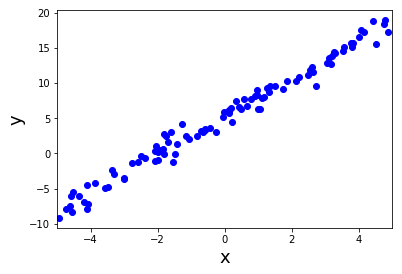

In [23]:
# 不要修改这里！
# 运行一次就够了！
from helper import *
from matplotlib import pyplot as plt
%matplotlib inline

# X,Y = generatePoints(seed, num=100)
X,Y, actual_m, actual_b = generatePoints(seed=10, num=100)

## 可视化
plt.xlim((-5,5))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b') # b 是blue的意思；color=blue
plt.show()

## 3.2 拟合一条直线

### 3.2.1 猜测一条直线

/Users/Dojo/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


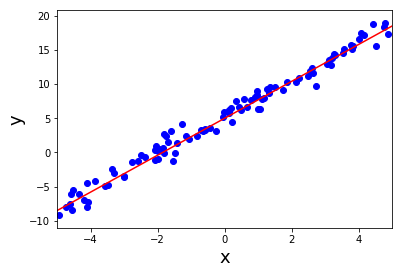

In [24]:
#TODO 请选择最适合的直线 y = mx + b
m = 2.7
b = 5

# 不要修改这里！
plt.xlim((-5,5))
x_vals = plt.axes().get_xlim()
y_vals = [m*x+b for x in x_vals]
plt.plot(x_vals, y_vals, '-', color='r')

plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')

plt.show()

### 3.2.2 计算平均平方误差 (MSE)

我们要编程计算所选直线的平均平方误差(MSE), 即数据集中每个点到直线的Y方向距离的平方的平均数，表达式如下：
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

In [25]:
# TODO 实现以下函数并输出所选直线的MSE
from decimal import Decimal, getcontext

getcontext().prec = 30

def calculateMSE(X,Y,m,b):
    if len(X) != len(Y):
        return None
    
    n = len(X)
    total = 0
    for i in xrange(n):
        total += ((Y[i] - m*X[i] - b)**2)
        
    mse = Decimal(total)/Decimal(n)
#     mse = round(mse, 4)
    return mse

print(calculateMSE(X,Y,m,b))

1.03769646016502690599736524746


### 3.2.3 调整参数 $m, b$ 来获得最小的平方平均误差

你可以调整3.2.1中的参数 $m,b$ 让蓝点均匀覆盖在红线周围，然后微调 $m, b$ 让MSE最小。

## 3.3 (选做) 找到参数 $m, b$ 使得平方平均误差最小

**这一部分需要简单的微积分知识(  $ (x^2)' = 2x $ )。因为这是一个线性代数项目，所以设为选做。**

刚刚我们手动调节参数，尝试找到最小的平方平均误差。下面我们要精确得求解 $m, b$ 使得平方平均误差最小。

定义目标函数 $E$ 为
$$
E = \frac{1}{2}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

因为 $E = \frac{n}{2}MSE$, 所以 $E$ 取到最小值时，$MSE$ 也取到最小值。要找到 $E$ 的最小值，即要找到 $m, b$ 使得 $E$ 相对于 $m$, $E$ 相对于 $b$ 的偏导数等于0. 

因此我们要解下面的方程组。

$$
\begin{cases}
\displaystyle
\frac{\partial E}{\partial m} =0 \\
\\
\displaystyle
\frac{\partial E}{\partial b} =0 \\
\end{cases}
$$

### 3.3.1 计算目标函数相对于参数的导数
首先我们计算两个式子左边的值

证明/计算：
$$
\frac{\partial E}{\partial m} = \sum_{i=1}^{n}{-x_i(y_i - mx_i - b)}
$$

$$
\frac{\partial E}{\partial b} = bx
$$

TODO 证明:  

$$
\begin{multline*}
1. 证明  \frac{\partial E}{\partial m} = \sum_{i=1}^{n}{-x_i(y_i - mx_i - b)}
\end{multline*}
$$

$$ 
假设：
\begin{multline}
\begin{cases}
\displaystyle
E = E(u) = \frac{1}{2} \sum_{i=1}^{n}u^2
\\
\displaystyle
u = -mx_{i}-(b-y_{i})
\end{cases}   \\
\end{multline}
$$

$$
\begin{multline}
通过复合函数求导法则：\frac{\partial E}{\partial m}={E_{m}}'={E_{u}}'\cdot{u_{m}}' \\
\end{multline}
$$

$$
\begin{align*}
\begin{cases}
{E_{u}}' &= ( \frac{1}{2} \sum_{i=1}^{n}u^2)'= \sum_{i=1}^{n}u= \sum_{i=1}^{n}(y_{i}-mx_{i}-b)) \\
{u_{m}}' &=   (-mx_{i}-(b+y_{i}))'=-x_{i}\\
\end{cases}  \\
\end{align*}
$$

$$
\rightarrow \frac{\partial E}{\partial m}=  \sum_{i=1}^{n}{-x_i(y_i - mx_i - b)}
$$

$$
\begin{multline*}
2. 证明  \frac{\partial E}{\partial b} = \sum_{i=1}^{n}{-(y_i - mx_i - b)}
\end{multline*}
$$

$$ 
假设：
\begin{multline}
\begin{cases}
\displaystyle
E = E(u) = \frac{1}{2} \sum_{i=1}^{n}u^2
\\
\displaystyle
u = -mx_{i}-(b-y_{i})
\end{cases}   \\
\end{multline}
$$

$$
\begin{multline}
通过复合函数求导法则：\frac{\partial E}{\partial b}={E_{b}}'={E_{u}}'\cdot{u_{b}}' \\
\end{multline}
$$

$$
\begin{align*}
\begin{cases}
{E_{u}}' &= ( \frac{1}{2} \sum_{i=1}^{n}u^2)'= \sum_{i=1}^{n}u= \sum_{i=1}^{n}(y_{i}-mx_{i}-b)) \\
{u_{b}}' &=   (-mx_{i}-(b+y_{i}))'=-x_{i}\\
\end{cases}  \\
\end{align*}
$$

$$
\rightarrow \frac{\partial E}{\partial b}=  \sum_{i=1}^{n}{-(y_i - mx_i - b)}
$$


### 3.3.2 实例推演

现在我们有了一个二元二次方程组

$$
\begin{cases}
\displaystyle
\sum_{i=1}^{n}{-x_i(y_i - mx_i - b)} =0 \\
\\
\displaystyle
\sum_{i=1}^{n}{-(y_i - mx_i - b)} =0 \\
\end{cases}
$$

为了加强理解，我们用一个实际例子演练。

我们要用三个点 $(1,1), (2,2), (3,2)$ 来拟合一条直线 y = m*x + b, 请写出

- 目标函数 $E$, 
- 二元二次方程组，
- 并求解最优参数 $m, b$

TODO 写出目标函数，方程组和最优参数  

1. $E = \frac{1}{2}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}$
2. 二元二次方程组
$$
\begin{cases}
\displaystyle
\sum_{i=1}^{n}{-x_i(y_i - mx_i - b)} =0 \\
\\
\displaystyle
\sum_{i=1}^{n}{-(y_i - mx_i - b)} =0 \\
\end{cases}
\rightarrow
带入 (1,1), (2,2), (3,2)  
\rightarrow
\begin{cases}
\displaystyle
\ (-1-4-6)+(m+4m+9m)+(b+2b+3b)=0 
\\
\displaystyle
\ (-1-2-2)+(m+2m+3m)+(b+b+b)=0
\end{cases}
\\
\rightarrow
\begin{cases}
\ 6b+14m=11
\\
\ 3b+6m=5
\end{cases}
\rightarrow 得到增广矩阵 
\begin{bmatrix}
6 & 14 & 11  \\
3 & 6  & 5
\end{bmatrix}
\rightarrow 经过高斯消元法得到RREF \rightarrow
\begin{bmatrix}
1 & 0 & \frac{2}{3}  \\
0 & 1 & \frac{1}{2}
\end{bmatrix}
$$

3. 求解最有参数m,b  
$m=\frac{1}{2}$  
$b=\frac{2}{3}$

### 3.3.3 将方程组写成矩阵形式

我们的二元二次方程组可以用更简洁的矩阵形式表达，将方程组写成矩阵形式更有利于我们使用 Gaussian Jordan 消元法求解。

请证明 
$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} = X^TXh - X^TY
$$

其中向量 $Y$, 矩阵 $X$ 和 向量 $h$ 分别为 :
$$
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$

TODO 证明:

$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} = X^TXh - X^TY
$$

$$
\begin{align*}
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} 
& = 
\begin{bmatrix}
    \sum_{i=1}^{n}{-x_i(y_i - mx_i - b)} \\
    \sum_{i=1}^{n}{-(y_i - mx_i - b)} 
\end{bmatrix} 
\\ & =
\begin{bmatrix}
    \sum_{i=1}^{n}{mx_{i}^2} + \sum_{i=1}^{n}{bx_{i}} \\
    \sum_{i=1}^{n}{mx_{i}} + \sum_{i=1}^{n}b
\end{bmatrix} 
-
\begin{bmatrix}
     \sum_{i=1}^{n}{x_{i}y_{i}} \\
     \sum_{i=1}^{n}{y_{i}}
\end{bmatrix}
\\ & =
\begin{bmatrix}
    \sum_{i=1}^{n}{x_{i}^2} &   \sum_{i=1}^{n}{x_{i}} \\
    \sum_{i=1}^{n}{x_{i}}   &   \sum_{i=1}^{n}1
\end{bmatrix} 
\cdot
\begin{bmatrix}
    m \\
    b
\end{bmatrix}
-
\begin{bmatrix}
     \sum_{i=1}^{n}{x_{i}y_{i}} \\
     \sum_{i=1}^{n}{y_{i}}
\end{bmatrix}
\\ & =
\begin{bmatrix}
    x_{1}^2+x_{2}^2+...x_{n}^2  &   x_{1}+x_{2}+...x_{n} \\
     x_{1}+x_{2}+...x_{n}       &   n
\end{bmatrix} 
\cdot
\begin{bmatrix}
    m \\
    b
\end{bmatrix}
-
\begin{bmatrix}
     x_{1}y_{1}+x_{2}y_{2}+x_{3}y_{3} ...+x_{n}y_{n} \\
     y_{1}+y_{2}+y_{3}+...+y_{n}
\end{bmatrix}
\\ & =
\begin{bmatrix}
    x_1 & x_2 & ... & x_n \\
    1   &  1  & ... & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix}
\cdot
\begin{bmatrix}
    m \\
    b
\end{bmatrix}
-
\begin{bmatrix}
    x_1 & x_2 & ... & x_n \\
    1   &  1  & ... & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
\\ & =
\ X^TXh - X^TY
\end{align*}
$$

至此我们知道，通过求解方程 $X^TXh = X^TY$ 来找到最优参数。这个方程十分重要，他有一个名字叫做 **Normal Equation**，也有直观的几何意义。你可以在 [子空间投影](http://open.163.com/movie/2010/11/J/U/M6V0BQC4M_M6V2AJLJU.html) 和 [投影矩阵与最小二乘](http://open.163.com/movie/2010/11/P/U/M6V0BQC4M_M6V2AOJPU.html) 看到更多关于这个方程的内容。

### 3.4 求解 $X^TXh = X^TY$ 

在3.3 中，我们知道线性回归问题等价于求解 $X^TXh = X^TY$ (如果你选择不做3.3，就勇敢的相信吧，哈哈)

#### 求解方法
1. 根据公式构建增广矩阵  
$$
\begin{cases}
\displaystyle
\sum_{i=1}^{n}{-x_i(y_i - mx_i - b)} =0 \\
\\
\displaystyle
\sum_{i=1}^{n}{-(y_i - mx_i - b)} =0 \\
\end{cases}
\rightarrow
\begin{cases}
\ m(\sum_{i=1}^{n}x_i^2) + b(\sum_{i=1}^{n}x_i) = \sum_{i=1}^{n}(x_iy_i)
\\
\ m(\sum_{i=1}^{n}x_i) + b(\sum_{i=1}^{n}1) = \sum_{i=1}^{n}(y_i)
\end{cases}
$$

\begin{align*}
列顺序：&m \ + \ b = VALUE  \\
&\begin{bmatrix}
    \sum_{i=1}^{n}x_i^2  &  \sum_{i=1}^{n}x_i  &  \sum_{i=1}^{n}(x_iy_i)  \\
    \sum_{i=1}^{n}x_i    &  \sum_{i=1}^{n}1    &  \sum_{i=1}^{n}(y_i)
\end{bmatrix}
\end{align*}

对增广矩阵进行Gaussian Jordan可以求得 $m,b$ 的值

In [26]:
# TODO 实现线性回归
'''
参数：X, Y
返回：m，b
'''
from decimal import Decimal, getcontext

getcontext().prec = 30
    
def sum_of_xi_yi(X,Y):
    n = len(X)
    total = 0
    for i in xrange(n):
        total += Decimal(X[i])*Decimal(Y[i])
    return total

def linearRegression(X,Y):
    xi_squared = sum(Decimal(x)**2 for x in X)
    xi = sum(Decimal(x) for x in X)
    xi_yi = sum_of_xi_yi(X,Y)
    yi = sum(Decimal(y) for y in Y)
    n = len(X)
    
    A = [[xi_squared, xi],[xi, n]]
    b = [[xi_yi], [yi]]
    h = gj_Solve(A, b)
    m = h[0][0]
    b = h[1][0]
    return m, b

m,b = linearRegression(X,Y)
print(m,b)

(2.6721, 5.2645)


你求得的回归结果是什么？
请使用运行以下代码将它画出来。

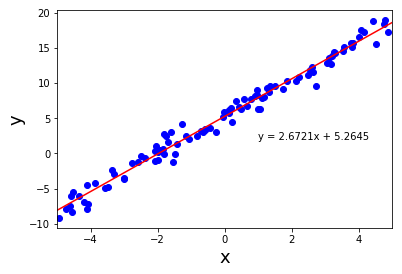

In [27]:
# 请不要修改下面的代码
x1,x2 = -5,5
y1,y2 = x1*m+b, x2*m+b

plt.xlim((-5,5))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')
plt.plot((x1,x2),(y1,y2),'r')
plt.text(1,2,'y = {m}x + {b}'.format(m=m,b=b))
plt.show()

你求得的回归结果对当前数据集的MSE是多少？

In [28]:
MSE = calculateMSE(X,Y,m,b)
print "MSE={}".format(MSE)

MSE=0.960756106823316571308168931864
